# EDA of UP 2022 

* [myneta.info](https://myneta.info/)

## Extracting data

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(1, 425):
        try:
            print("Trying ID", i, end = ' => ')
            url = "https://myneta.info/Uttarpradesh2022/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-3]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            print("Saving", title, end = ' => ')
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('ERROR')
        else:
            constituencies += 1
            print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv('punjab.csv', index=False)
    

main()

Trying ID 1 => Saving Behat , Saharanpur => SUCCESS
Trying ID 2 => Saving Nakur , Saharanpur => SUCCESS
Trying ID 3 => Saving Saharanpur Nagar , Saharanpur => SUCCESS
Trying ID 4 => Saving Saharanpur , Saharanpur => SUCCESS
Trying ID 5 => Saving Deoband , Saharanpur => SUCCESS
Trying ID 6 => Saving Rampur Maniharan (Sc) , Saharanpur => SUCCESS
Trying ID 7 => Saving Gangoh , Saharanpur => SUCCESS
Trying ID 8 => Saving Etmadpur , Agra => SUCCESS
Trying ID 9 => Saving Agra Cantt. (Sc) , Agra => SUCCESS
Trying ID 10 => Saving Agra South , Agra => SUCCESS
Trying ID 11 => Saving Agra North , Agra => SUCCESS
Trying ID 12 => Saving Agra Rural (Sc) , Agra => SUCCESS
Trying ID 13 => Saving Fatehpur Sikri , Agra => SUCCESS
Trying ID 14 => Saving Kheragarh , Agra => SUCCESS
Trying ID 15 => Saving Fatehabad , Agra => SUCCESS
Trying ID 16 => Saving Bah , Agra => SUCCESS
Trying ID 17 => Saving Khair (Sc) , Aligarh => SUCCESS
Trying ID 18 => Saving Barauli , Aligarh => SUCCESS
Trying ID 19 => Saving A

Trying ID 151 => Saving Bindki , Fatehpur => SUCCESS
Trying ID 152 => Saving Fatehpur , Fatehpur => SUCCESS
Trying ID 153 => Saving Ayah Shah , Fatehpur => SUCCESS
Trying ID 154 => Saving Husainganj , Fatehpur => SUCCESS
Trying ID 155 => Saving Khaga (Sc) , Fatehpur => SUCCESS
Trying ID 156 => Saving Sirsaganj , Firozabad => SUCCESS
Trying ID 157 => Saving Shikohabad , Firozabad => SUCCESS
Trying ID 158 => Saving Firozabad , Firozabad => SUCCESS
Trying ID 159 => Saving Jasrana , Firozabad => SUCCESS
Trying ID 160 => Saving Tundla (Sc) , Firozabad => SUCCESS
Trying ID 161 => Saving Noida , Gautam Buddha Nagar => SUCCESS
Trying ID 162 => Saving Dadri , Gautam Buddha Nagar => SUCCESS
Trying ID 163 => Saving Jewar , Gautam Buddha Nagar => SUCCESS
Trying ID 164 => Saving Loni , Ghaziabad => SUCCESS
Trying ID 165 => Saving Muradnagar , Ghaziabad => SUCCESS
Trying ID 166 => Saving Sahibabad , Ghaziabad => SUCCESS
Trying ID 167 => Saving Ghaziabad , Ghaziabad => SUCCESS
Trying ID 168 => Saving

Trying ID 298 => Saving Ghosi , Mau => SUCCESS
Trying ID 299 => Saving Madhuban , Mau => SUCCESS
Trying ID 300 => Saving Meerut South , Meerut => SUCCESS
Trying ID 301 => Saving Meerut , Meerut => SUCCESS
Trying ID 302 => Saving Meerut Cantt. , Meerut => SUCCESS
Trying ID 303 => Saving Kithore , Meerut => SUCCESS
Trying ID 304 => Saving Hastinapur (Sc) , Meerut => SUCCESS
Trying ID 305 => Saving Sardhana , Meerut => SUCCESS
Trying ID 306 => Saving Siwalkhas , Meerut => SUCCESS
Trying ID 307 => Saving Chhanbey (Sc) , Mirzapur => SUCCESS
Trying ID 308 => Saving Mirzapur , Mirzapur => SUCCESS
Trying ID 309 => Saving Majhawan , Mirzapur => SUCCESS
Trying ID 310 => Saving Chunar , Mirzapur => SUCCESS
Trying ID 311 => Saving Marihan , Mirzapur => SUCCESS
Trying ID 312 => Saving Kanth , Moradabad => SUCCESS
Trying ID 313 => Saving Thakurdwara , Moradabad => SUCCESS
Trying ID 314 => Saving Moradabad Rural , Moradabad => SUCCESS
Trying ID 315 => Saving Moradabad Nagar , Moradabad => SUCCESS
Try

## Visualizing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [3]:
data = pd.read_csv('up.csv')
data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Ali Khan,IND,1,10th Pass,31,Behat + Saharanpur,23542241,0
1,Dharam Pal Singh,IND,0,Graduate,46,Behat + Saharanpur,5565000,0
2,Mo. Ikram,IND,0,5th Pass,47,Behat + Saharanpur,2481845,200000
3,Naresh Saini,BJP,0,Post Graduate,57,Behat + Saharanpur,29506003,5779181
4,Poonam Kamboj,INC,0,Post Graduate,36,Behat + Saharanpur,13552777,1800000
...,...,...,...,...,...,...,...,...
4401,Manoj Kumar Chaubey,IND,2,Post Graduate,42,Sevapuri + Varanasi,2172346,0
4402,Neel Ratan Singh,BJP,2,12th Pass,50,Sevapuri + Varanasi,19373958,0
4403,Santosh,Moulik Adhikar Party,0,12th Pass,51,Sevapuri + Varanasi,12149100,258000
4404,Surendra,Jan Adhikar Party,2,Graduate,44,Sevapuri + Varanasi,24450000,1500000


In [4]:
data.describe()

,Criminal Cases,Age,Total Assets,Liabilities
count,4406.000000,4406.000000,4.406000e+03,4.406000e+03
mean,0.761008,45.750113,2.871756e+07,2.466444e+06
std,2.618772,11.525502,9.350072e+07,1.156151e+07
min,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,37.000000,1.171153e+06,0.000000e+00
50%,0.000000,45.000000,5.553000e+06,0.000000e+00
75%,1.000000,53.000000,2.232900e+07,8.110000e+05
max,87.000000,92.000000,2.968849e+09,3.012381e+08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       4406 non-null   object
 1   Party           4406 non-null   object
 2   Criminal Cases  4406 non-null   int64 
 3   Education       4406 non-null   object
 4   Age             4406 non-null   int64 
 5   Constituency    4406 non-null   object
 6   Total Assets    4406 non-null   int64 
 7   Liabilities     4406 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 275.5+ KB


In [6]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

285

In [7]:
candidates = np.size(data["Candidate"])
candidates

4406

In [8]:
candidates - np.size(data["Candidate"].unique())

703

In [9]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

161

In [10]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

10

In [11]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                  Education            
Nawab Kazim Ali Khan       Post Graduate            2968848840
Shah Alam (Guddu Jamali)   Post Graduate            1958570465
Supriya Aron               Post Graduate            1573049919
Amit Agarwal               Graduate Professional    1487664557
Devender Nagpal            Graduate                 1407648765
S.K.Sharma                 12th Pass                1122970707
Rahul Yadav                Others                   1006302500
Kunal Singh                Graduate Professional     880892909
Sahender Singh Ramala      10th Pass                 845070499
Rais Ahmad                 Graduate                  730221928
Yashpal Singh Yadav        Post Graduate             707404691
Ajay Kapoor                Graduate                  694617271
Vinay Shankar              Graduate Professional     675228964
Rakesh Pandey              8th Pass                  634647716
Kartar Singh Bhadana       8th Pass                  608746125
Mohd N

In [12]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                          Education            
Kunal Singh                        Graduate Professional    301238121
Rakesh Pandey                      8th Pass                 232288591
Devender Nagpal                    Graduate                 214852017
Dr. Raj Kumar Singh Gautam         Doctorate                174701582
Shahana Siddiqui                   8th Pass                 172943000
Yashpal Singh Yadav                Post Graduate            133863643
Amit Agarwal                       Graduate Professional    132973889
Umashankar Singh                   12th Pass                130235095
Vikas Gupta                        Post Graduate            123191949
Omkumar                            12th Pass                121649591
Sahender Singh Ramala              10th Pass                111385036
Subhash Passi                      10th Pass                101500000
Rajesh Kumar                       Post Graduate            101071878
Ajay Kapoor                      

In [13]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Ali Khan,IND,1,10th Pass,31,Behat + Saharanpur,23542241,0
1,Dharam Pal Singh,IND,0,Graduate,46,Behat + Saharanpur,5565000,0
2,Mo. Ikram,IND,0,5th Pass,47,Behat + Saharanpur,2481845,200000
3,Naresh Saini,BJP,0,Post Graduate,57,Behat + Saharanpur,29506003,5779181
4,Poonam Kamboj,INC,0,Post Graduate,36,Behat + Saharanpur,13552777,1800000
...,...,...,...,...,...,...,...,...
4396,Anju Anand Singh,INC,0,Graduate,40,Sevapuri + Varanasi,5606261,450000
4397,Arvind Kumar Tripathi,BSP,0,Graduate Professional,54,Sevapuri + Varanasi,85557041,14356147
4400,Kailash Patel,AAP,1,12th Pass,57,Sevapuri + Varanasi,26566854,0
4401,Manoj Kumar Chaubey,IND,2,Post Graduate,42,Sevapuri + Varanasi,2172346,0


In [14]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

,Candidate
Party,
IND,900
INC,390
BSP,383
BJP,371
AAP,334


<AxesSubplot:xlabel='Party'>

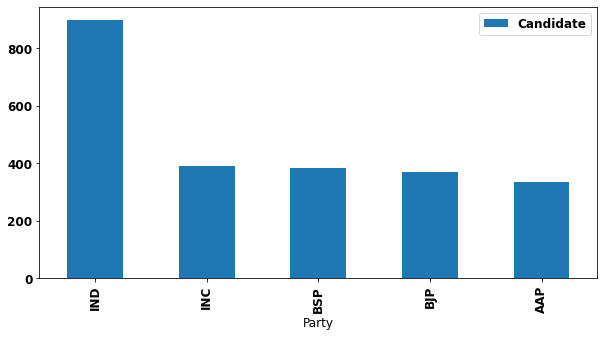

In [15]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

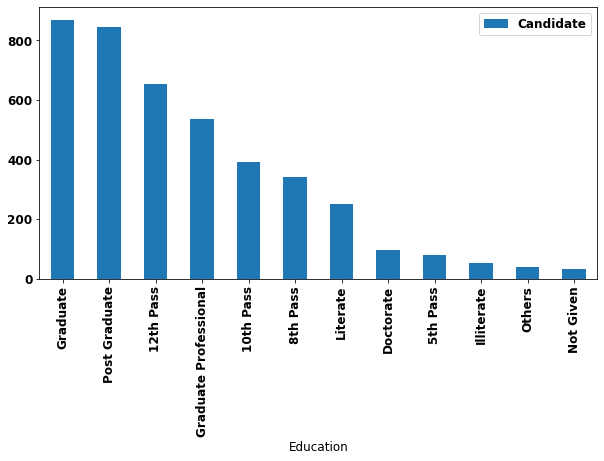

In [16]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [17]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                           
Party                       AAP    BJP   BSP    INC    IND
Education                                                 
10th Pass                  32.0   23.0  35.0   31.0  106.0
12th Pass                  50.0   46.0  73.0   40.0  167.0
5th Pass                    1.0    1.0   4.0    4.0   36.0
8th Pass                   15.0    8.0  33.0   21.0  110.0
Doctorate                  10.0   18.0  13.0   11.0   11.0
Graduate                   86.0   92.0  88.0   92.0  188.0
Graduate Professional      47.0   61.0  51.0   64.0   85.0
Illiterate                  2.0    0.0   1.0    3.0   20.0
Literate                    8.0    5.0  17.0   24.0   83.0
Not Given                   3.0    1.0   0.0    1.0   13.0
Others                      6.0    1.0   2.0    3.0    5.0
Post Graduate              84.0  117.0  79.0  102.0  164.0

In [18]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Mohammad Azam Khan,Rampur + Rampur,SP,Graduate Professional,87
1,Mohammad Abdullah Azam Khan,Suar + Rampur,SP,Post Graduate,43
2,Atul Pradhan,Sardhana + Meerut,SP,Graduate,38
3,Sandeep Yadav,Allahabad North + Prayagraj,SP,Graduate,35
4,Yogesh Verma,Hastinapur (Sc) + Meerut,SP,12th Pass,32
5,Naseer Ahmad Khan,Chamraua + Rampur,SP,Post Graduate,30
6,Ajay Kumar Lallu,Tamkuhi Raj + Kushinagar,INC,Post Graduate,29
7,Sudhir Singh,Sahajanwa + Gorakhpur,BSP,10th Pass,26
8,Vijay Mishra,Gyanpur + Bhadohi,Pragatisheel Manav Samaj Party,Graduate,24
9,Ravidas Mehrotra,Lucknow Central + Lucknow,SP,Graduate Professional,22


In [19]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Ramkhiladi,Gunnaur + Sambhal,IND,Graduate,0
1,Ravindra Kumar,Madhaugarh + Jalaun,IND,12th Pass,0
2,Sheetal Kushwaha,Madhaugarh + Jalaun,BSP,Post Graduate,0
3,Siddarth Devolia,Madhaugarh + Jalaun,INC,Graduate Professional,0
4,Suresh Babu,Madhaugarh + Jalaun,IND,10th Pass,0
5,Ainul Hasan Mansoori,Kalpi + Jalaun,IND,10th Pass,0
6,Anjana Devi,Kalpi + Jalaun,IND,Literate,0
7,Santosh Kumar,Koraon (Sc) + Prayagraj,Sanatan Sanskriti Raksha Dal,12th Pass,0
8,Raj Mani,Koraon (Sc) + Prayagraj,BJP,Post Graduate,0
9,Jishan,Kalpi + Jalaun,Jan Adhikar Party,12th Pass,0


<AxesSubplot:xlabel='Party'>

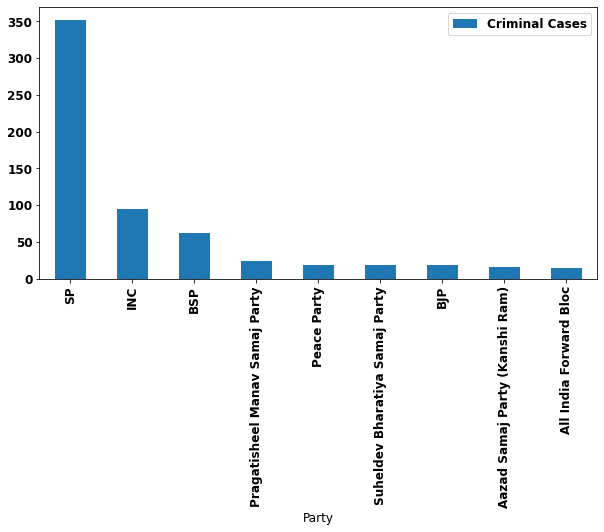

In [20]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [21]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

,Candidate,Constituency,Party,Total Assets
0,Nawab Kazim Ali Khan,Rampur + Rampur,INC,2968848840
1,Shah Alam (Guddu Jamali),Mubarakpur + Azamgarh,All India Majlis-E-Ittehadul Muslimeen,1958570465
2,Supriya Aron,Bareilly Cantt. + Bareilly,SP,1573049919
3,Amit Agarwal,Meerut Cantt. + Meerut,BJP,1487664557
4,Devender Nagpal,Naugawan Sadat + Amroha,BJP,1407648765
5,S.K.Sharma,Mathura + Mathura,BSP,1122970707
6,Rahul Yadav,Sikandrabad + Bulandsahar,SP,1006302500
7,Kunal Singh,Sahaswan + Budaun,Rashtriya Parivartan Dal,880892909
8,Sahender Singh Ramala,Chhaprauli + Baghpat,BJP,845070499
9,Rais Ahmad,Badaun + Budaun,SP,730221928


<AxesSubplot:xlabel='Party'>

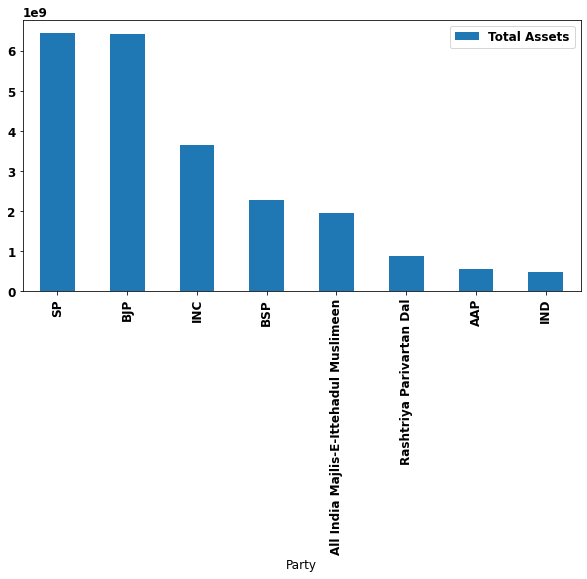

In [22]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 